No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


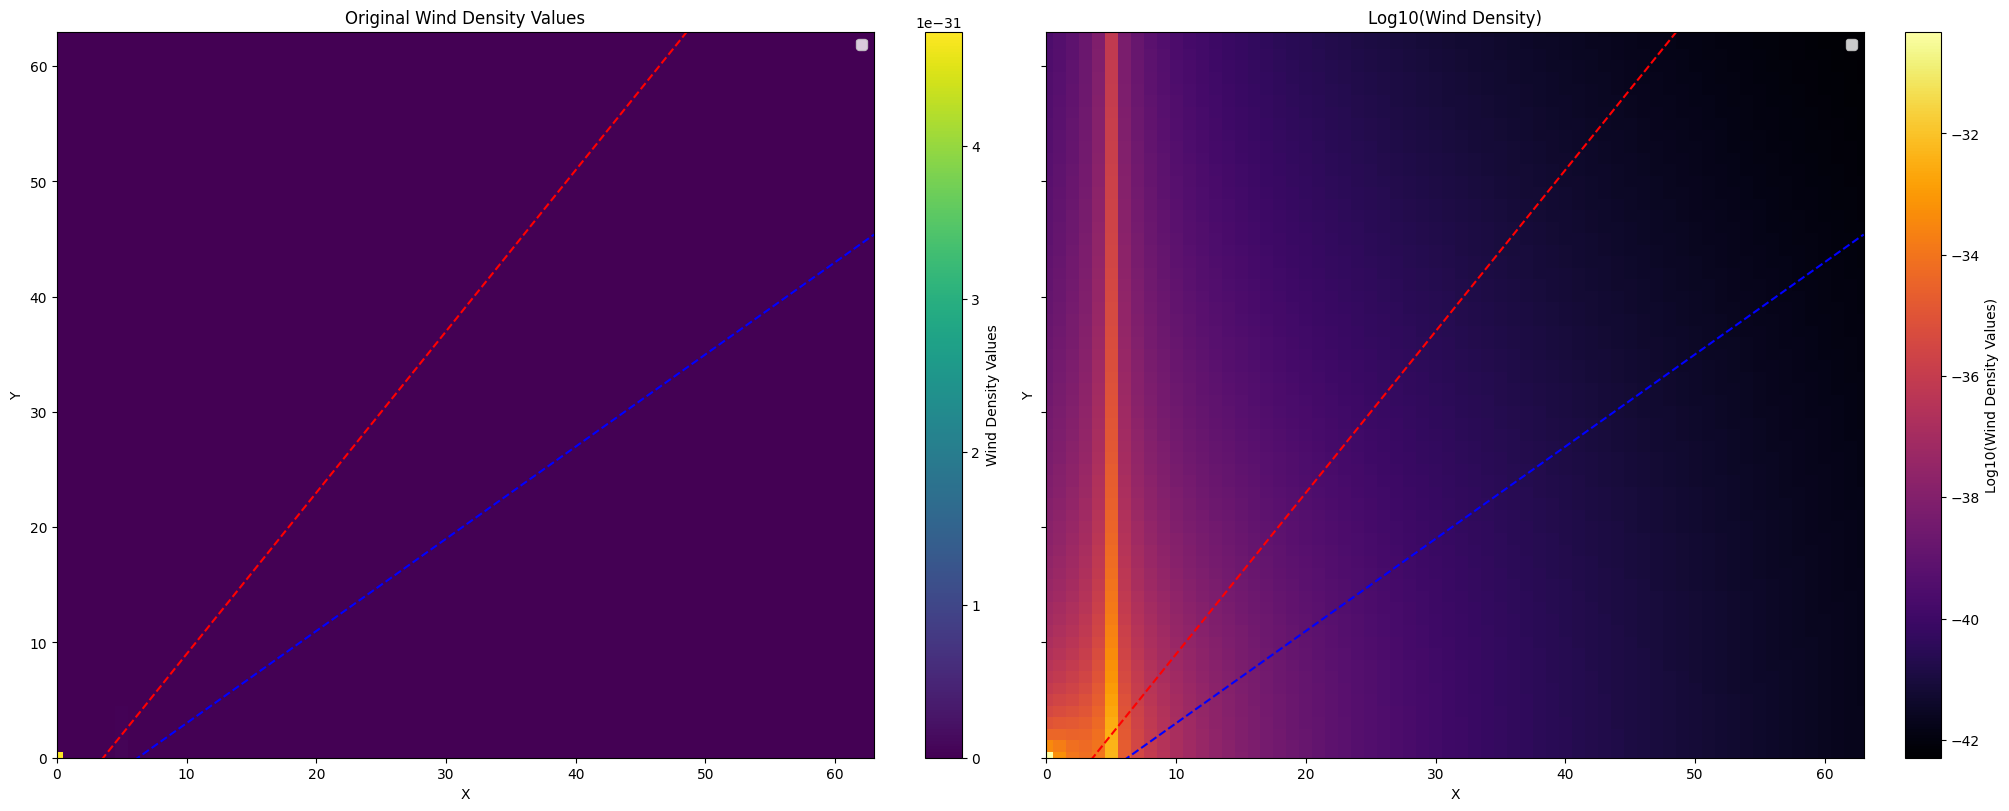

In [7]:
import numpy as np
import matplotlib.pyplot as plt

wind_density_data = np.loadtxt('parameters/wind_density_output.csv', delimiter=',')
log_wind_density_data = np.log10(wind_density_data + 1e-50)

x_range = np.linspace(0, wind_density_data.shape[1] - 1, wind_density_data.shape[1])
y_range = np.linspace(0, wind_density_data.shape[0] - 1, wind_density_data.shape[0])
X, Y = np.meshgrid(x_range, y_range)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), constrained_layout=True, sharey=True)

pcm = axes[0].pcolormesh(X, Y, wind_density_data, shading='auto', cmap='viridis')
fig.colorbar(pcm, ax=axes[0], label='Wind Density Values')
axes[0].set_title('Original Wind Density Values')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].set_xlim(0, 63)
axes[0].set_ylim(0, 63)

pcm = axes[1].pcolormesh(X, Y, log_wind_density_data, shading='auto', cmap='inferno')
fig.colorbar(pcm, ax=axes[1], label='Log10(Wind Density Values)')
axes[1].set_title('Log10(Wind Density)')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].set_xlim(0, 63)
axes[1].set_ylim(0, 63)

m1, c1 = 1.4, -5
m2, c2 = 0.8, -5
x_line = np.array([0, 63])
y_line1 = m1 * x_line + c1
y_line2 = m2 * x_line + c2

axes[0].plot(x_line, y_line1, 'r--') # label=f'y = {m1}x + {c1}'
axes[0].plot(x_line, y_line2, 'b--')
axes[1].plot(x_line, y_line1, 'r--')
axes[1].plot(x_line, y_line2, 'b--')

axes[0].legend()
axes[1].legend()

plt.show()
